<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:120%; text-align:left; color: #fffff">

<h2 align="left"><font color=#4D869C>Problem:</font></h2>

Consider a dataset of radiological images of teeth. First, you separate the image of each tooth by using segment anything, and then perform the classification operation according to the data in the csv file. Note that each tooth can have one of the 5 available classes as a target.


<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:120%; text-align:left">

<h2 align="left"><font color=#4D869C>Objectives:</font></h2>

1. **Image Segmentation by SAM:** Implement image segmentation using the SAM (Segmentation Anything Model) to accurately delineate regions of interest within the images.
2. **Custom Dataset:** Create and curate a custom dataset tailored to the specific requirements of the image segmentation and classification tasks.
3. **Classification:** Develop and optimize classification algorithms to accurately categorize segmented regions into predefined classes.
4. **Model Training and Evaluation:** Train the segmentation and classification models on the custom dataset and rigorously evaluate their performance to ensure robustness and accuracy.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left">

<h2 align="left"><font color=#4D869C>Table of Contents:</font></h2>
    
* [Step 1 | Setup and Initialization](#initial_analysis)  
* [Step 2 | Image Segmentation](#data_cleaning)
* [Step 3 | Custom Dataset](#eda)
* [Step 4 | Classification Model and Evaluation](#preprocessing)
* [Step 5 | Conclusions](#conclusions)

<a id="#initial_analysis"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px; padding: 15px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

# <b><span style='color:#CDE8E5'>Step 1.1 |</span><span style='color:#4D869C'> Setup and Initialization:</span></b>

In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git




  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-gxzmyn3d



  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-gxzmyn3d



  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588



  Preparing metadata (setup.py) ... done





In [2]:
!pip install opencv-python pycocotools matplotlib onnxruntime onnx















































































   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 17.3 MB/s eta 0:00:00






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 90.3 MB/s eta 0:00:00






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00








In [3]:
!wget 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

--2024-08-07 21:15:29--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth



Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.59, 13.227.219.33, 13.227.219.10, ...



Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.59|:443... connected.



HTTP request sent, awaiting response... 200 OK



Length: 2564550879 (2.4G) [binary/octet-stream]



Saving to: 'sam_vit_h_4b8939.pth'







sam_vit_h_4b8939.pt 100%[===================>]   2.39G   279MB/s    in 9.4s    







2024-08-07 21:15:39 (262 MB/s) - 'sam_vit_h_4b8939.pth' saved [2564550879/2564550879]






In [4]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

--2024-08-07 21:15:40--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth



Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.59, 13.227.219.70, 13.227.219.10, ...



Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.59|:443... connected.



HTTP request sent, awaiting response... 200 OK



Length: 375042383 (358M) [binary/octet-stream]



Saving to: 'sam_vit_b_01ec64.pth'







sam_vit_b_01ec64.pt 100%[===================>] 357.67M   228MB/s    in 1.6s    







2024-08-07 21:15:42 (228 MB/s) - 'sam_vit_b_01ec64.pth' saved [375042383/375042383]






In [5]:
kaggle = True

if kaggle:
    !conda install -y gdown
    !gdown --id 1ExhVWEb8uq8nZlFlt9JY95sPd7rVsDrn

    !unzip '/kaggle/working/DentalSegmentation.zip' -d '/kaggle/working/'

else:
    from google.colab import drive
    drive.mount('/content/drive')

    !unzip '/content/drive/MyDrive/DentalSegmentation.zip' -d '/content/'

Retrieving notices: ...working... done



Channels:



 - rapidsai



 - nvidia



 - conda-forge



 - defaults



 - pytorch



Platform: linux-64






Solving environment: done







## Package Plan ##







  environment location: /opt/conda







  added / updated specs:



    - gdown











The following packages will be downloaded:







    package                    |            build



    ---------------------------|-----------------



    conda-24.7.1               |  py310hff52083_0         940 KB  conda-forge



    filelock-3.15.4            |     pyhd8ed1ab_0          17 KB  conda-forge



    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge



    openssl-3.3.1              |       h4bc722e_2         2.8 MB  conda-forge



    ------------------------------------------------------------



                                           Total:         3.7 MB







The following NEW packages will be INSTALLED:







  filelock          

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import tensorflow as tf
from tensorflow.keras.applications import Xception,ResNet50, DenseNet201,MobileNet, EfficientNetB0, ResNet101
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer, Input, Conv2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, MaxPooling2D, Add, AveragePooling2D, Flatten,Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from tensorflow.keras.layers import Layer,Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, SeparableConv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

2024-08-09 10:28:37.775041: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 10:28:37.775195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 10:28:37.914081: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
import torch
from tqdm import tqdm
from statistics import mean
from collections import defaultdict
from torch.nn.functional import threshold, normalize
from segment_anything.utils.transforms import ResizeLongestSide
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


device = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
train_data = pd.read_csv('./DentalSegmentation/dataset/train/_annotations.csv')
validation_data = pd.read_csv('./DentalSegmentation/dataset/valid/_annotations.csv')
test_data = pd.read_csv('./DentalSegmentation/dataset/test/_annotations.csv')

In [9]:
train_data.head()

filename  width  height     class  \
0  0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg    512     256   Implant   
1  0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg    512     256  Fillings   
2  0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg    512     256   Implant   
3  0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg    512     256   Implant   
4  0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg    512     256   Implant   

   xmin  ymin  xmax  ymax  
0   175   116   206   153  
1   170   109   189   133  
2   221   124   257   178  
3   302   126   329   175  
4   335   114   360   154

In [10]:
print("Train dataset:", train_data.shape)
print("Validation dataset:", validation_data.shape)
print("Test dataset:", test_data.shape)

Train dataset: (8030, 8)



Validation dataset: (780, 8)



Test dataset: (473, 8)


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>



RangeIndex: 8030 entries, 0 to 8029



Data columns (total 8 columns):



 #   Column    Non-Null Count  Dtype 



---  ------    --------------  ----- 



 0   filename  8030 non-null   object



 1   width     8030 non-null   int64 



 2   height    8030 non-null   int64 



 3   class     8030 non-null   object



 4   xmin      8030 non-null   int64 



 5   ymin      8030 non-null   int64 



 6   xmax      8030 non-null   int64 



 7   ymax      8030 non-null   int64 



dtypes: int64(6), object(2)



memory usage: 502.0+ KB


In [12]:
n_image = train_data['filename'].nunique() + validation_data['filename'].nunique() + test_data['filename'].nunique()
print("Total number of images: ", n_image)

Total number of images:  1269


<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:120%; text-align:left; color: #fffff">

<h2 align="left"><font color=#4D869C>1.1 Dataset Description:</font></h2>

|     | Variable Name  | Role          | Type          |
|:--- | :---           |    :----:     |          ---: |
|1    | filename       | Path          | Categorical   |
|2    | width          | Feature       | Integer       |
|3    | height         | Feature       | Integer       |
|4    | class          | Feature       | Categorical   |
|5    | xmin           | Feature       | Integer       |
|6    | ymin           | Feature       | Integer       |
|7    | xmax           | Feature       | Integer       |
|8    | ymax           | Feature       | Integer       |

1. **`filename`**: This column contains the name of the image file. It serves as a unique identifier for each image in the dataset, allowing us to reference and access the corresponding image data.

2. **`width`**: The width of the image in pixels. This integer value provides information about the horizontal dimension of the image.

3. **`height`**: The height of the image in pixels. This integer value gives information about the vertical dimension of the image.

4. **`class`**: The categorical variable representing the class or label of the object detected in the image. It is used for classification tasks.

5. **`xmin`**: The x-coordinate of the top-left corner of the bounding box that contains the object of interest. This integer value helps in defining the horizontal position of the object within the image.

6. **`ymin`**: The y-coordinate of the top-left corner of the bounding box that contains the object of interest. This integer value helps in defining the vertical position of the object within the image.

7. **`xmax`**: The x-coordinate of the bottom-right corner of the bounding box that contains the object of interest. This integer value helps in defining the horizontal extent of the object within the image.

8. **`ymax`**: The y-coordinate of the bottom-right corner of the bounding box that contains the object of interest. This integer value helps in defining the vertical extent of the object within the image.

</div>


# <b><span style='color:#CDE8E5'>Step 1.2 |</span><span style='color:#4D869C'> Data review:</span></b>

In [13]:
train_data['full_path'] = './DentalSegmentation/dataset/train/' + train_data['filename']
validation_data['full_path'] = './DentalSegmentation/dataset/valid/' + validation_data['filename']
test_data['full_path'] = './DentalSegmentation/dataset/test/' + test_data['filename']

In [14]:
def plot_bounding_boxes_in_row(df):
    fig, axs = plt.subplots(1, len(df), figsize=(20, 10))
    idx = 0
    for _, row in df.iterrows():
        image_path = row['full_path']
        bbox = (row['xmin'], row['ymin'], row['xmax'], row['ymax'])
        label = row['class']

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        xmin, ymin, xmax, ymax = bbox
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(255, 0, 0), thickness=2)
        if label:
            cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        axs[idx].imshow(image)
        axs[idx].axis('off')
        axs[idx].set_title(f"Image {idx+1}")
        idx +=1
    plt.show()


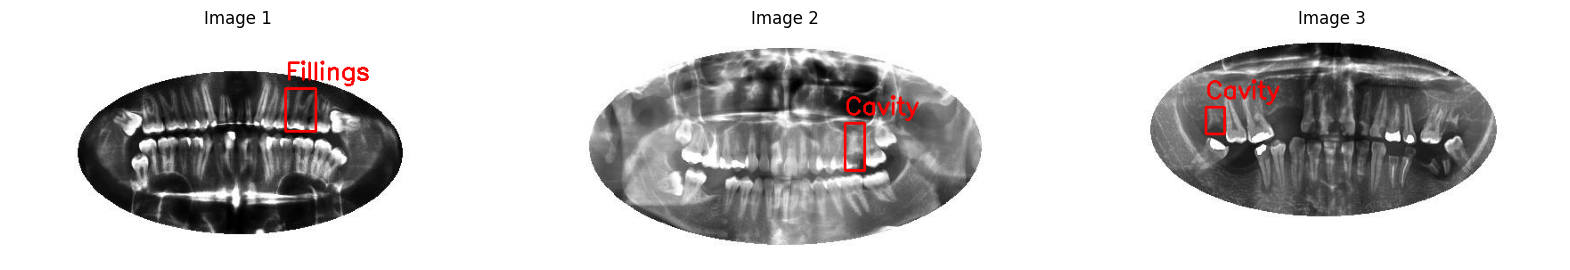

In [15]:
# Plot all images in one row
plot_bounding_boxes_in_row(train_data.sample(3))

<a id="data_cleaning"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px;  padding: 15px;">Step 2 | Image Segmentation</p>
⬆️ [Tabel of Contents](#contents_tabel)

# <b><span style='color:#CDE8E5'>Step 2.1 |</span><span style='color:#4D869C'> Segment Anything Model review:</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:120%; text-align:left">

### **What is SAM?**
SAM is an image segmentation model developed by Meta AI. It was trained over 11 billion segmentation masks from millions of images. It is designed to take human prompts, in the form of points, bounding boxes or even a text prompt describing what should be segmented.


### **What are the key features of SAM?**

- **Zero-shot generalization**: SAM can be used to segment objects that it has never seen before, without the need for additional training.

- **Flexible prompting**: SAM can be prompted with a variety of input, including points, boxes, and text descriptions.

- **Real-time mask computation**: SAM can generate masks for objects in real time. This makes SAM ideal for applications where it is necessary to segment objects quickly, such as autonomous driving and robotics.

- **Ambiguity awareness**: SAM is aware of the ambiguity of objects in images. This means that SAM can generate masks for objects even when they are partially occluded or overlapping with other objects.

### **How does SAM work?**

![](https://raw.githubusercontent.com/facebookresearch/segment-anything/main/assets/model_diagram.png)

SAM works by first encoding the image into a high-dimensional vector representation. The prompt is encoded into a separate vector representation. The two vector representations are then combined and passed to a mask decoder, which outputs a mask for the object specified by the prompt.

The image encoder is a vision transformer (ViT-H) model, which is a large language model that has been pre-trained on a massive dataset of images. The prompt encoder is a simple text encoder that converts the input prompt into a vector representation. The mask decoder is a lightweight transformer model that predicts the object mask from the image and prompt embeddings.

[**SAM paper**](https://ai.meta.com/research/publications/segment-anything/)

In [16]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [17]:
sam = sam_model_registry["default"](checkpoint="sam_vit_h_4b8939.pth")

sam.to(device=device)
predictor = SamPredictor(sam)

In [18]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [19]:
sample = train_data.sample(1).iloc[0]
image = cv2.imread(sample['full_path'])

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [20]:
predictor.set_image(image)

In [21]:
masks = mask_generator.generate(image)

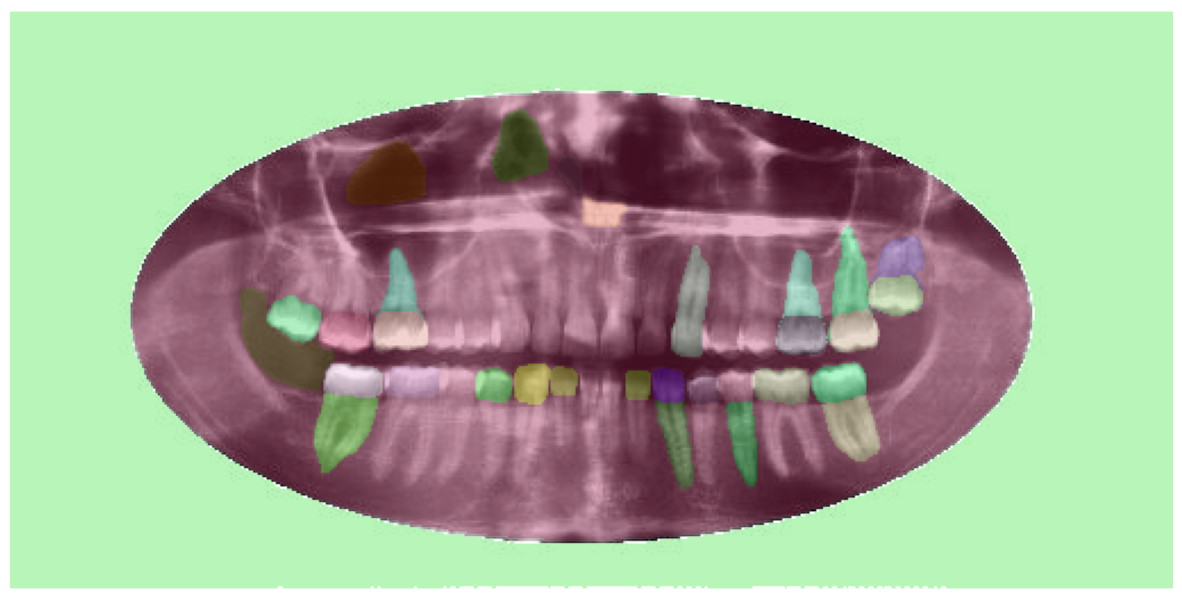

In [22]:
plt.figure(figsize=(15, 15))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

# <b><span style='color:#CDE8E5'>Step 2.2 |</span><span style='color:#4D869C'> Fine tune SAM:</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:120%; text-align:left">

It seems that the performance of the sam model on dental radiology images is good, that's why we need to fine-tune the sam model to extract teeth images.

In [23]:
bbox_coords = {}
ground_truth_masks = {}
# Iterate through the dataset
for _, row in train_data.head(100).iterrows():
    # Extract necessary information
    name = row['filename']
    image_path = row['full_path']
    x_min = row['xmin']
    y_min = row['ymin']
    x_max = row['xmax']
    y_max = row['ymax']

    # Store the bounding box coordinates in the dictionary
    bbox_coords[name] = np.array([x_min, y_min, x_max, y_max])

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    width, height = image.shape
    image_shape = (width, height)
    mask = np.zeros(image_shape, dtype=np.uint8)
    mask[y_min:y_max, x_min:x_max] = 1

    ground_truth_masks[name] = mask


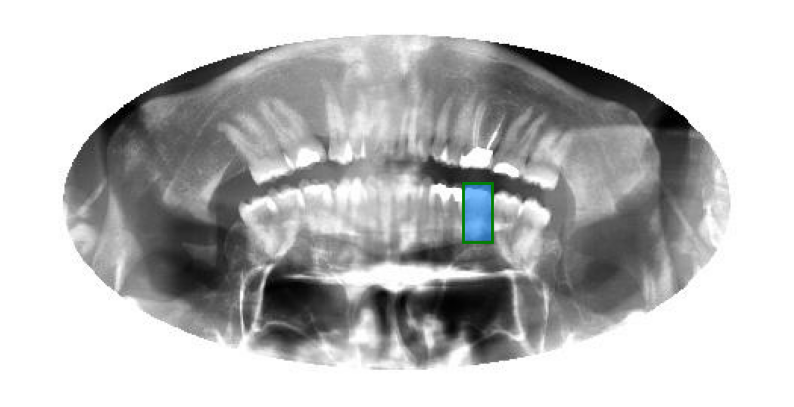

In [24]:
name = train_data.head(100).sample(1).iloc[0]['filename']
image = cv2.imread(f'./DentalSegmentation/dataset/train/{name}')

plt.figure(figsize=(10,10))
plt.imshow(image)
show_box(bbox_coords[name], plt.gca())
show_mask(ground_truth_masks[name], plt.gca())
plt.axis('off')
plt.show()

# <b><span style='color:#CDE8E5'>Step 2.2.1 |</span><span style='color:#4D869C'> Prepare Fine Tuning:</span></b>

In [25]:
sam_model = sam_model_registry['vit_b'](checkpoint='sam_vit_b_01ec64.pth')

In [26]:
# make sure we only compute gradients for mask decoder
for name, param in sam_model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

In [27]:
sam_model.to(device)
sam_model.train()

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


In [28]:
# Preprocess the images

transformed_data = defaultdict(dict)
for k in bbox_coords.keys():
  image = cv2.imread(f'./DentalSegmentation/dataset/train/{k}')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  transform = ResizeLongestSide(sam_model.image_encoder.img_size)
  input_image = transform.apply_image(image)
  input_image_torch = torch.as_tensor(input_image, device=device)
  transformed_image = input_image_torch.permute(2, 0, 1).contiguous()[None, :, :, :]

  input_image = sam_model.preprocess(transformed_image)
  original_image_size = image.shape[:2]
  input_size = tuple(transformed_image.shape[-2:])

  transformed_data[k]['image'] = input_image
  transformed_data[k]['input_size'] = input_size
  transformed_data[k]['original_image_size'] = original_image_size

In [29]:
# Set up the optimizer, hyperparameter tuning will improve performance here
lr = 1e-4
wd = 0
optimizer = torch.optim.Adam(sam_model.mask_decoder.parameters(), lr=lr, weight_decay=wd)

loss_fn = torch.nn.MSELoss()
# loss_fn = torch.nn.BCELoss()
keys = list(bbox_coords.keys())

# <b><span style='color:#CDE8E5'>Step 2.2.2 |</span><span style='color:#4D869C'> Run fine tuning:</span></b>

In [30]:

num_epochs = 10
losses = []

for epoch in range(num_epochs):
  epoch_losses = []
  # Just train on the first 100 examples
  for k in keys[:20]:
    input_image = transformed_data[k]['image'].to(device)
    input_size = transformed_data[k]['input_size']
    original_image_size = transformed_data[k]['original_image_size']

    # No grad here as we don't want to optimise the encoders
    with torch.no_grad():
      image_embedding = sam_model.image_encoder(input_image)

      prompt_box = bbox_coords[k]
      box = transform.apply_boxes(prompt_box, original_image_size)
      box_torch = torch.as_tensor(box, dtype=torch.float, device=device)
      box_torch = box_torch[None, :]

      sparse_embeddings, dense_embeddings = sam_model.prompt_encoder(
          points=None,
          boxes=box_torch,
          masks=None,
      )
    low_res_masks, iou_predictions = sam_model.mask_decoder(
      image_embeddings=image_embedding,
      image_pe=sam_model.prompt_encoder.get_dense_pe(),
      sparse_prompt_embeddings=sparse_embeddings,
      dense_prompt_embeddings=dense_embeddings,
      multimask_output=False,
    )

    upscaled_masks = sam_model.postprocess_masks(low_res_masks, input_size, original_image_size).to(device)
    binary_mask = normalize(threshold(upscaled_masks, 0.0, 0))

    gt_mask_resized = torch.from_numpy(np.resize(ground_truth_masks[k], (1, 1, ground_truth_masks[k].shape[0], ground_truth_masks[k].shape[1]))).to(device)
    gt_binary_mask = torch.as_tensor(gt_mask_resized > 0, dtype=torch.float32)

    loss = loss_fn(binary_mask, gt_binary_mask)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_losses.append(loss.item())
  losses.append(epoch_losses)
  print(f'EPOCH: {epoch}')
  print(f'Mean loss: {mean(epoch_losses)}')

EPOCH: 0



Mean loss: 0.004037123460036058



EPOCH: 1



Mean loss: 0.004037123460036058



EPOCH: 2



Mean loss: 0.004037123460036058



EPOCH: 3



Mean loss: 0.004037123460036058



EPOCH: 4



Mean loss: 0.004037123460036058



EPOCH: 5



Mean loss: 0.004037123460036058



EPOCH: 6



Mean loss: 0.004037123460036058



EPOCH: 7



Mean loss: 0.004037123460036058



EPOCH: 8



Mean loss: 0.004037123460036058



EPOCH: 9



Mean loss: 0.004037123460036058


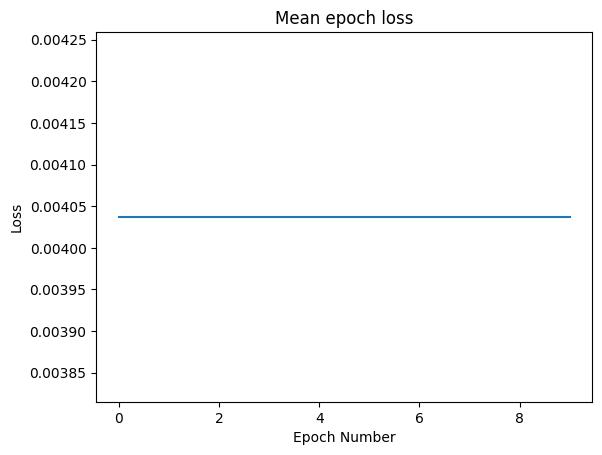

In [31]:
mean_losses = [mean(x) for x in losses]
mean_losses

plt.plot(list(range(len(mean_losses))), mean_losses)
plt.title('Mean epoch loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')

plt.show()

In [32]:
# Load up the model with default weights
sam_model_orig = sam_model_registry['vit_b'](checkpoint='sam_vit_b_01ec64.pth')
sam_model_orig.to(device);

In [33]:
# Set up predictors for both tuned and original models
predictor_tuned = SamPredictor(sam_model)
predictor_original = SamPredictor(sam_model_orig)

In [34]:
# The model has not seen keys[21] (or keys[20]) since we only trained on keys[:20]
name = train_data.head(100).sample(1).iloc[0]['filename']
image = cv2.imread(f'./DentalSegmentation/dataset/train/{name}')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor_tuned.set_image(image)
predictor_original.set_image(image)

input_bbox = np.array(bbox_coords[k])

masks_tuned, _, _ = predictor_tuned.predict(
    point_coords=None,
    box=input_bbox,
    multimask_output=False,
)

masks_orig, _, _ = predictor_original.predict(
    point_coords=None,
    box=input_bbox,
    multimask_output=False,
)

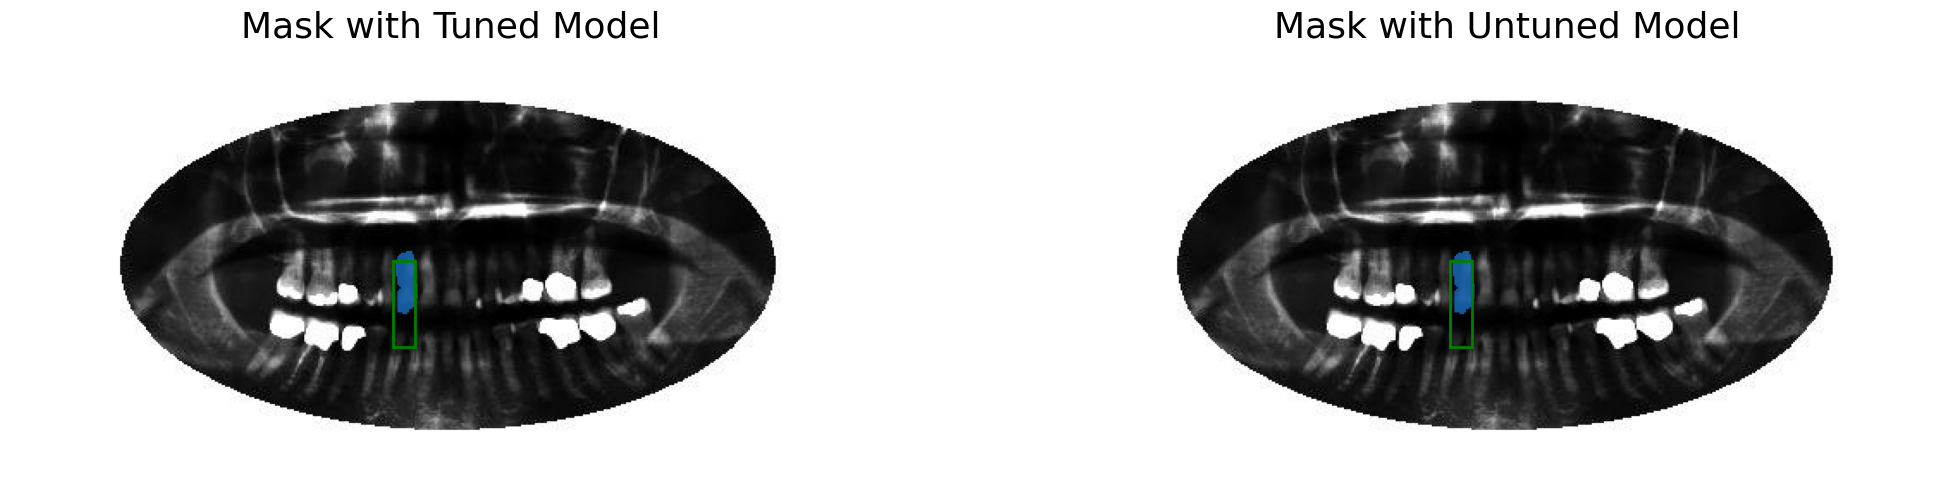

In [35]:
%matplotlib inline
_, axs = plt.subplots(1, 2, figsize=(25, 25))


axs[0].imshow(image)
show_mask(masks_tuned, axs[0])
show_box(input_bbox, axs[0])
axs[0].set_title('Mask with Tuned Model', fontsize=26)
axs[0].axis('off')


axs[1].imshow(image)
show_mask(masks_orig, axs[1])
show_box(input_bbox, axs[1])
axs[1].set_title('Mask with Untuned Model', fontsize=26)
axs[1].axis('off')

plt.show()

# <b><span style='color:#CDE8E5'>Step 2.2.3 |</span><span style='color:#4D869C'> Save the Model:</span></b>

In [36]:
# Save the model's state dictionary to a file
torch.save(sam_model.state_dict(), "./fune_tune_model_checkpoint.pth")

<a id="eda"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px;  padding: 15px;">Step 3 | Custom Dataset:</p>
⬆️ [Tabel of Contents](#contents_tabel)

# <b><span style='color:#CDE8E5'>Step 3.1 |</span><span style='color:#4D869C'> Classified image extraction:</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:120%; text-align:left">
Using the tooth model prompt and the coordinates of the classified teeth, we make pictures of each class.

In [37]:
# Load up the model with fine tune weights
#sam_model_tune = sam_model_registry['vit_b'](checkpoint='/content/drive/MyDrive/AI/fune_tune_model_checkpoint.pth')
#sam_model_tune.to(device)

# define predictor
#predictor = SamPredictor(sam_model_tune)

sam = sam_model_registry['vit_h'](checkpoint='sam_vit_h_4b8939.pth')
sam.to(device)

# define predictor
predictor = SamPredictor(sam)

In [38]:
def create_custom_image(dataset, predictor, data):

    for idx, row in dataset.iterrows():
        # Extract necessary information
        name = row['filename']
        image_path = row['full_path']
        x_min = row['xmin']
        y_min = row['ymin']
        x_max = row['xmax']
        y_max = row['ymax']
        clas  = row['class']

        # define bounding box coordinates
        input_bbox = np.array([x_min, y_min, x_max, y_max])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        predictor.set_image(image)

        mask, _, _ = predictor.predict(
        point_coords=None,
        box=input_bbox,
        multimask_output=False,
        )

        h, w = mask.shape[-2:]
        mask = mask.reshape(h, w, 1)

        segmented_image = image * mask

        # Assuming segmented_image is a numpy array
        # plt.imshow(segmented_image)

        # Convert the numpy array to a PIL image
        pil_image = Image.fromarray(segmented_image)

        # We'll save this mask for re-use for our model
        mask_dir = f"./custom/{data}/{clas}"
        os.makedirs(mask_dir, exist_ok=True)
        pil_image.save(os.path.join(mask_dir, str(idx) + name))



In [39]:
create_custom_image(dataset=train_data, predictor=predictor, data='train')

In [40]:
create_custom_image(dataset=validation_data, predictor=predictor, data='valid')

In [41]:
create_custom_image(dataset=test_data, predictor=predictor, data='test')

# <b><span style='color:#CDE8E5'>Step 3.2 |</span><span style='color:#4D869C'> Extraction of healthy teeth:</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:120%; text-align:left">
We checked the classified teeth and converted all the classified teeth corresponding to a photo into a mask. Then, we applied the prepared mask to the output of the SAM model, isolating the damaged teeth in our output. Finally, we compared the result with the average and maximum area of the teeth and classified the output masks as representing healthy teeth.

In [42]:
def get_bbox_cls_dental(dataset):

    box_data = {}
    bboxes, fnames = [], []

    for _, sample in dataset.iterrows():

        fname = sample['filename']
        if len(bboxes) > 0 and (fname != fnames[-1]):
            box_data[f"{fnames[-1]}"] = bboxes
        if fname not in fnames:
            bboxes = []
            bboxes.append([])
            fnames.append(fname);
            bboxes[-1].append([sample['xmin'], sample['ymin'], sample['xmax'], sample['ymax']])
        else:
            bboxes[-1].append([sample['xmin'], sample['ymin'], sample['xmax'], sample['ymax']])

    return box_data


def clean_cls_dental(bbox_data, filename, image):
    bboxes = bbox_data[filename]
    mask = np.ones_like(image)

    for idx, bbox in enumerate(bboxes[0]):
        mask[bbox[1]:bbox[3], bbox[0]:bbox[2]] = 0

    return mask

In [43]:
bbox_train_data = get_bbox_cls_dental(train_data)
bbox_valid_data = get_bbox_cls_dental(validation_data)
bbox_test_data = get_bbox_cls_dental(test_data)

In [44]:
# Calculate the mean width and height
w = (train_data['xmax'] - train_data['xmin']).mean()
h = (train_data['ymax'] - train_data['ymin']).mean()

# Calculate the minimum mask region area
min_mask_region_area = int(w * h)

# Calculate the maximum width and height
max_w = (train_data['xmax'] - train_data['xmin']).max()
max_h = (train_data['ymax'] - train_data['ymin']).max()

# Calculate the maximum mask region area
max_mask_region_area = int(max_w * max_h)

print("min_mask_region_area:", min_mask_region_area)
print("max_mask_region_area:", max_mask_region_area)

min_mask_region_area: 1087



max_mask_region_area: 4860


In [45]:
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    pred_iou_thresh=0.80,
    stability_score_thresh=0.90,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=min_mask_region_area,
)

In [46]:
filename = train_data.sample(1).iloc[0]['filename']
image = cv2.cvtColor(cv2.imread(f"./DentalSegmentation/dataset/train/{filename}"), cv2.COLOR_BGR2RGB)
clean_mask = clean_cls_dental(bbox_data=bbox_train_data, filename=filename, image=image)

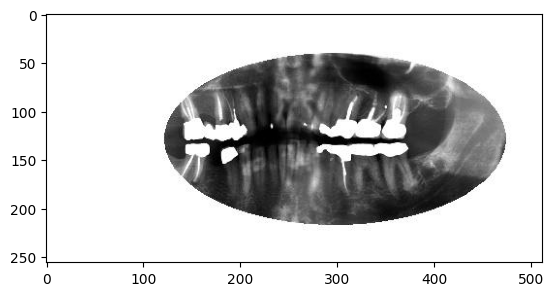

In [47]:
plt.imshow(image / 255)

In [48]:
masks = mask_generator.generate(image)

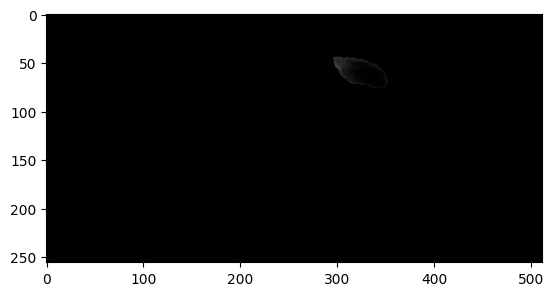

In [49]:
for mask in masks:
  mask_cl = mask['segmentation'] * clean_mask[:, :, 0]
  area_cl = np.sum(mask_cl == True)

  box = mask['bbox']
  x_i, y_i, x_f, y_f = box[0], box[1], box[2], box[3]
  w_mask, h_mask = x_f - x_i, y_f - y_i

  if min_mask_region_area / 1.5 <= area_cl <= max_mask_region_area:
    mask_cl = np.stack((mask_cl,) * 3, axis=-1)
    segment_image = mask_cl * image
    plt.imshow(segment_image)

    pil_image = Image.fromarray(segment_image)

    # We'll save this mask for re-use for our edit
    mask_dir = f"./custom/train/Healthy"
    os.makedirs(mask_dir, exist_ok=True)
    pil_image.save(os.path.join(mask_dir, filename))
    #show_mask(mask_cl, plt.gca(), random_color=True)

In [50]:
def create_custom_healthy_image(dataset, bbox_data, data, mask_generator):

    # Calculate the mean width and height
    w = (dataset['xmax'] - dataset['xmin']).mean()
    h = (dataset['ymax'] - dataset['ymin']).mean()

    # Calculate the minimum mask region area
    min_mask_region_area = int(w * h)

    # Calculate the maximum width and height
    max_w = (dataset['xmax'] - dataset['xmin']).max()
    max_h = (dataset['ymax'] - dataset['ymin']).max()

    # Calculate the maximum mask region area
    max_mask_region_area = int(max_w * max_h)

    for filename in bbox_data:

        meta_data = dataset[dataset['filename']==filename]
        # Extract necessary information
        if not meta_data.empty:
          image_path = meta_data['full_path'].values[0]

          image = cv2.imread(image_path)
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

          clean_mask = clean_cls_dental(bbox_data=bbox_data, filename=filename, image=image)
          masks = mask_generator.generate(image)

          for idx, mask in enumerate(masks):
            mask_cl = mask['segmentation'] * clean_mask[:, :, 0]
            area_cl = np.sum(mask_cl == True)

            box = mask['bbox']
            x_i, y_i, x_f, y_f = box[0], box[1], box[2], box[3]
            w_mask, h_mask = x_f - x_i, y_f - y_i

            if min_mask_region_area * 0.6 <= area_cl <= min_mask_region_area:
                h, w = mask_cl.shape[-2:]
                mask_cl = mask_cl.reshape(h, w, 1)

                segment_image = mask_cl * image

                #plt.imshow(segment_image)

                pil_image = Image.fromarray(segment_image)

                # We'll save this mask for re-use for our edit
                mask_dir = f"./custom/{data}/Healthy"
                os.makedirs(mask_dir, exist_ok=True)
                pil_image.save(os.path.join(mask_dir, str(idx) + filename))

        else:
          continue



In [51]:
create_custom_healthy_image(dataset=train_data, bbox_data=bbox_train_data, data='train', mask_generator=mask_generator)

In [52]:
create_custom_healthy_image(dataset=validation_data, bbox_data=bbox_valid_data, data='valid', mask_generator=mask_generator)

In [53]:
create_custom_healthy_image(dataset=test_data, bbox_data=bbox_test_data, data='test', mask_generator=mask_generator)

# <b><span style='color:#CDE8E5'>Step 3.3 |</span><span style='color:#4D869C'> Download custom dataset:</span></b>

In [54]:
!zip -r custom.zip /kaggle/working/custom

  adding: kaggle/working/custom/ (stored 0%)



  adding: kaggle/working/custom/train/ (stored 0%)



  adding: kaggle/working/custom/train/Impacted Tooth/ (stored 0%)



  adding: kaggle/working/custom/train/Impacted Tooth/43790032_jpg.rf.2b9985c7ca182c111536ab6e8a080962.jpg (deflated 70%)



  adding: kaggle/working/custom/train/Impacted Tooth/55840170_jpg.rf.4fd8f8e6179d4c147396b5dfa63fb65e.jpg (deflated 68%)



  adding: kaggle/working/custom/train/Impacted Tooth/10130076_jpg.rf.fb6ea4dcb60407f2023aaef39929f171.jpg (deflated 72%)



  adding: kaggle/working/custom/train/Impacted Tooth/67650966_jpg.rf.b26d0bc913180635ac0d2ec2bb9c22e0.jpg (deflated 69%)



  adding: kaggle/working/custom/train/Impacted Tooth/37300343_jpg.rf.8a8d83e6524223299b7e9a19d9d2a52a.jpg (deflated 73%)



  adding: kaggle/working/custom/train/Impacted Tooth/75770774_jpg.rf.d065f14b7bb0933dbd1f2d63a6583f00.jpg (deflated 68%)



  adding: kaggle/working/custom/train/Impacted Tooth/77670402_jpg.rf.d6efdc46009b4c3c

<a id="preprocessing"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px;  padding: 15px;">Step 4 |  Classification Model and Evaluation</p>
⬆️ [Tabel of Contents](#contents_tabel)

# <b><span style='color:#CDE8E5'>Step 4.1 |</span><span style='color:#4D869C'> Load Image Datasets and Apply Augmentations:</span></b>

In [2]:
!conda install -y gdown
!gdown --id 1guJU_eLZ5JKmrTKv1pJ3iWLXdpvezEpW

!unzip '/kaggle/working/custom.zip' -d '/kaggle/working/'

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.7.1               |  py310hff52083_0         940 KB  conda-forge
    filelock-3.15.4            |     pyhd8ed1ab_0          17 KB  conda-forge
    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.3.1              |       h4bc722e_2         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.15.4-pyhd8ed1ab_0 
  gdown              conda-forge/noarch::gdow

In [3]:
train_dataset_path = '/kaggle/working/kaggle/working/custom/train/'
validation_dataset_path = '/kaggle/working/kaggle/working/custom/valid/'
test_dataset_path = '/kaggle/working/kaggle/working/custom/test/'

In [4]:
SEED = 10
IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 64

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 14152 images belonging to 5 classes.


In [6]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_dataset_path,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 1500 images belonging to 5 classes.
Found 880 images belonging to 5 classes.


In [7]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Cavity
1 : Fillings
2 : Healthy
3 : Impacted Tooth
4 : Implant


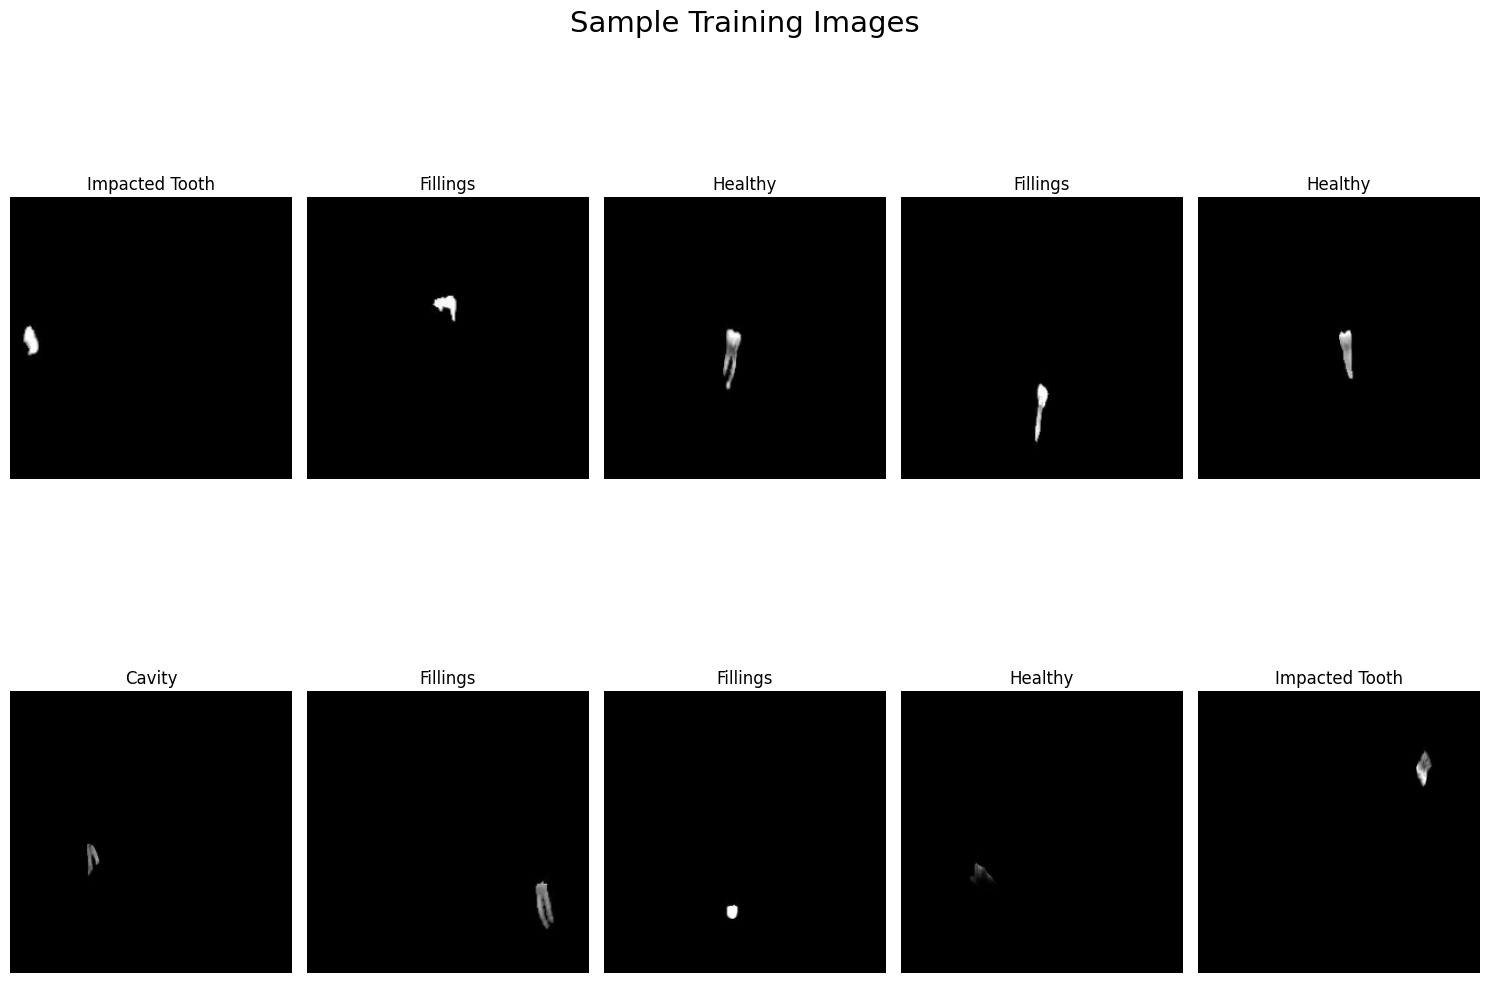

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()


# <b><span style='color:#CDE8E5'>Step 4.2 |</span><span style='color:#4D869C'> Handling Imbalanced Datasets:</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:120%; text-align:left">
Assign weights to each class based on their frequency, which makes the model pay more attention to the minority classes.

In [12]:
class_indices = train_generator.class_indices

samples_per_class = train_generator.classes
class_counts = {class_name: list(samples_per_class).count(class_index)
                for class_name, class_index in class_indices.items()}

print("Number of samples per class:\n")
for key, value in class_counts.items():
    print(f"{key} : {value}")

Number of samples per class:

Cavity : 576
Fillings : 5242
Healthy : 6122
Impacted Tooth : 428
Implant : 1784


In [13]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming you have a list of class labels
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# <b><span style='color:#CDE8E5'>Step 4.3 |</span><span style='color:#4D869C'> Trainning Model:</span></b>

In [14]:
model = Sequential([
    
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=5, activation='softmax')
    ])

optimizer = Adam(learning_rate=0.001)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 128)  │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 252, 252, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 124, 124, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,477,221 (28.52 MB)

 Trainable params: 7,476,773 (28.52 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [17]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [18]:
history = model.fit(train_generator, epochs=50, validation_data=validation_generator,
                       verbose=2,
                       class_weight=class_weights_dict,
                       callbacks=[reduce_lr])

Epoch 1/50


2024-08-09 10:39:06.670816: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[128,3,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,256,256]{3,2,1,0}, f32[64,128,252,252]{3,2,1,0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-09 10:39:07.241933: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.571326281s
Trying algorithm eng0{} for conv (f32[128,3,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,256,256]{3,2,1,0}, f32[64,128,252,252]{3,2,1,0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-09 10:39:09.113806: E external/local_xla/xla/service/sl

222/222 - 237s - 1s/step - accuracy: 0.2203 - loss: 3.3879 - val_accuracy: 0.1287 - val_loss: 1.5491 - learning_rate: 0.0010
Epoch 2/50
222/222 - 201s - 907ms/step - accuracy: 0.3332 - loss: 1.5537 - val_accuracy: 0.1060 - val_loss: 3.3322 - learning_rate: 0.0010
Epoch 3/50
222/222 - 201s - 907ms/step - accuracy: 0.4091 - loss: 1.4484 - val_accuracy: 0.1060 - val_loss: 55.7139 - learning_rate: 0.0010
Epoch 4/50
222/222 - 201s - 905ms/step - accuracy: 0.3799 - loss: 1.3746 - val_accuracy: 0.1060 - val_loss: 67.4384 - learning_rate: 0.0010
Epoch 5/50
222/222 - 203s - 912ms/step - accuracy: 0.3952 - loss: 1.3601 - val_accuracy: 0.1060 - val_loss: 45.5778 - learning_rate: 0.0010
Epoch 6/50
222/222 - 201s - 904ms/step - accuracy: 0.3748 - loss: 1.3356 - val_accuracy: 0.1060 - val_loss: 53.3538 - learning_rate: 0.0010
Epoch 7/50
222/222 - 220s - 991ms/step - accuracy: 0.3811 - loss: 1.2574 - val_accuracy: 0.1153 - val_loss: 2.8691 - learning_rate: 3.1623e-04
Epoch 8/50
222/222 - 199s - 895ms

# <b><span style='color:#CDE8E5'>Step 4.4 |</span><span style='color:#4D869C'> Evaluate Model:</span></b>

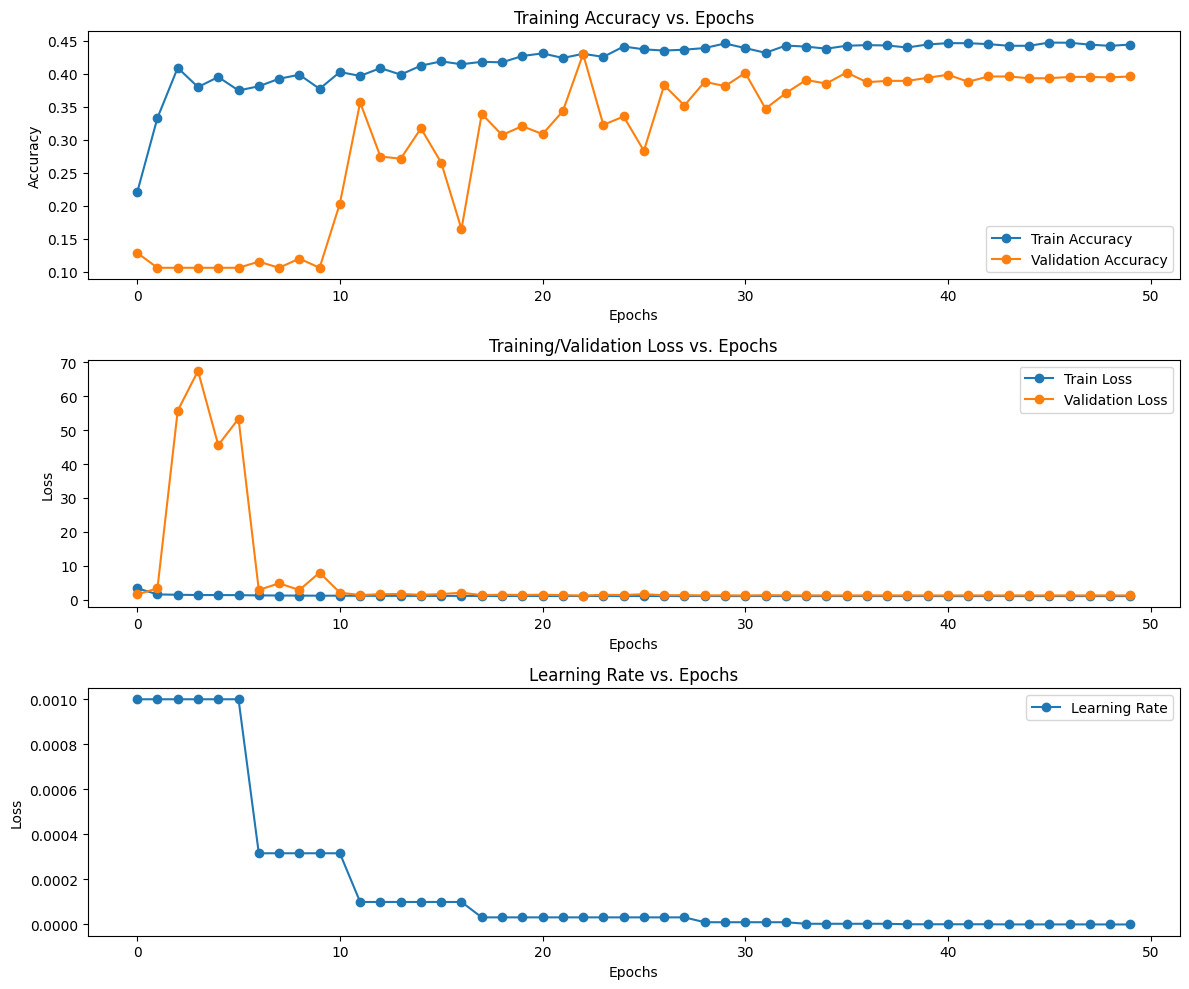

In [19]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['learning_rate']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [20]:
predictions = model.predict(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 579ms/step


In [21]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.3028 - loss: 1.3959


In [22]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     1.2108925580978394
Test Accuracy: 0.39431819319725037


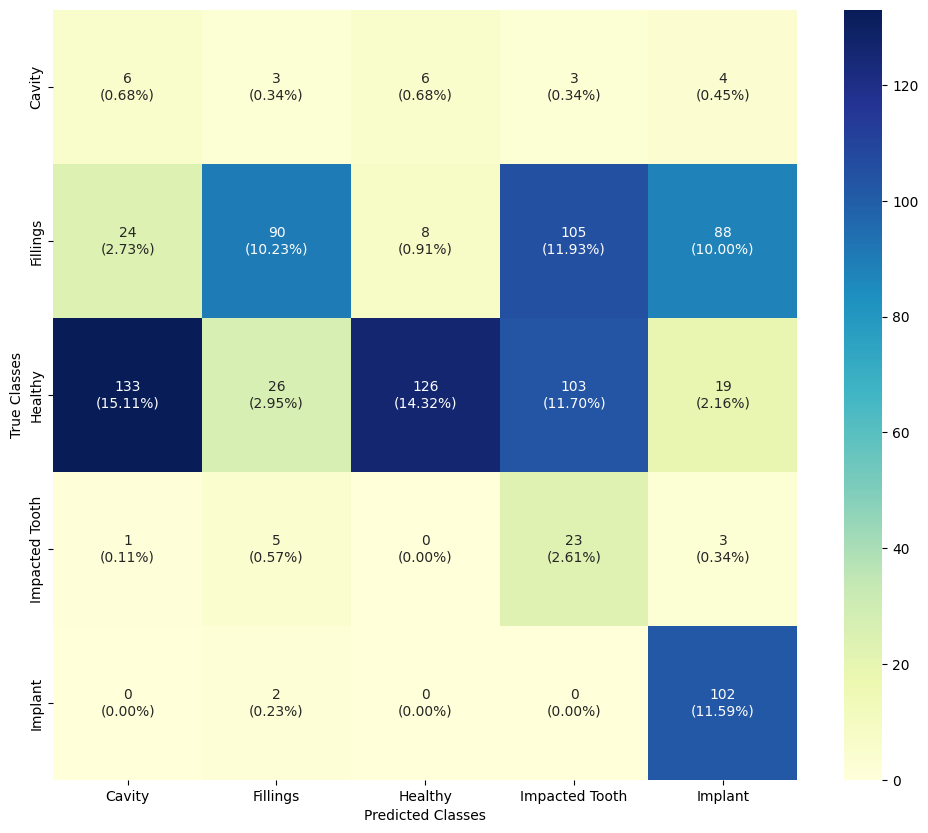

In [23]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(5, 5)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [24]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

                precision    recall  f1-score   support

        Cavity       0.04      0.27      0.06        22
      Fillings       0.71      0.29      0.41       315
       Healthy       0.90      0.31      0.46       407
Impacted Tooth       0.10      0.72      0.17        32
       Implant       0.47      0.98      0.64       104

      accuracy                           0.39       880
     macro avg       0.44      0.51      0.35       880
  weighted avg       0.73      0.39      0.44       880



<a id="conclusions"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px;  padding: 15px;">Step 5 | Conclusions</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:120%; text-align:left; color: #fffff">

<h3 align="left"><font color=#4D869C>Conclusions:</font></h3>
In this project, I tryed to fine-tuned the SAM model on dental radiography images. A custom dataset was created by extracting individual teeth and building a classification dataset. To address data imbalance, specific techniques were employed to enhance image classification performance. The model was trained and evaluated, demonstrating improved accuracy in identifying dental conditions.    

In [ ]:
# Sajad Hadadi